In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset_train =pd.read_csv("/content/drive/MyDrive/Google_Stock_Price_Train.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
train = dataset_train.loc[:,['Open']].values
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range= (0,1))
train_scaled = scaler.fit_transform(train)
train_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

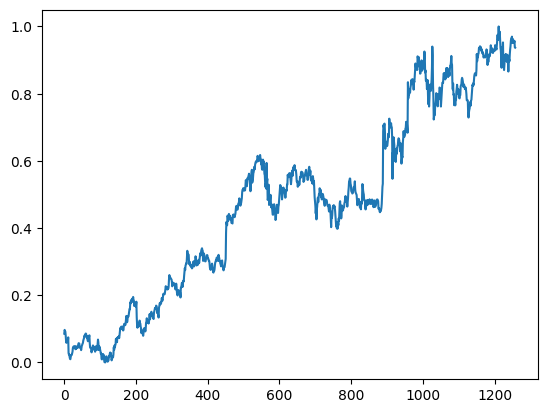

In [6]:
plt.plot(train_scaled)

In [7]:
X_train = []
y_train = []
timesteps = 50

for i in range(timesteps, 1250):
  X_train.append(train_scaled[i - timesteps: i, 0])
  y_train.append(train_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
X_train, y_train

(array([[0.08581368, 0.09701243, 0.09433366, ..., 0.03675869, 0.04486941,
         0.05065481],
        [0.09701243, 0.09433366, 0.09156187, ..., 0.04486941, 0.05065481,
         0.05214302],
        [0.09433366, 0.09156187, 0.07984225, ..., 0.05065481, 0.05214302,
         0.05612397],
        ...,
        [0.93048218, 0.9299055 , 0.93113327, ..., 0.94114145, 0.95762334,
         0.96413424],
        [0.9299055 , 0.93113327, 0.92750577, ..., 0.95762334, 0.96413424,
         0.96402262],
        [0.93113327, 0.92750577, 0.94415507, ..., 0.96413424, 0.96402262,
         0.96971501]]),
 array([0.05214302, 0.05612397, 0.05818885, ..., 0.96402262, 0.96971501,
        0.95077759]))

In [10]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.03675869],
        [0.04486941],
        [0.05065481]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.04486941],
        [0.05065481],
        [0.05214302]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.05065481],
        [0.05214302],
        [0.05612397]],

       ...,

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.94114145],
        [0.95762334],
        [0.96413424]],

       [[0.9299055 ],
        [0.93113327],
        [0.92750577],
        ...,
        [0.95762334],
        [0.96413424],
        [0.96402262]],

       [[0.93113327],
        [0.92750577],
        [0.94415507],
        ...,
        [0.96413424],
        [0.96402262],
        [0.96971501]]])

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

regressor = Sequential()

regressor.add(SimpleRNN(units=50, return_sequences=True, activation='tanh', input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0,2))

regressor.add(SimpleRNN(units=50, return_sequences=True, activation='tanh', input_shape= (X_train.shape[1],1)))
regressor.add(Dropout(0,2))

regressor.add(SimpleRNN(units=50, return_sequences=True, activation='tanh', input_shape= (X_train.shape[1],1)))
regressor.add(Dropout(0,2))

regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0,2))

#adding the output layer

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.1110
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0021
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - loss: 0.0014
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0011
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0010
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 0.0011
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 0.0011
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 7.2665e-04
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0011
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 8.1001e-04
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 9.2572e-04
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 6.4683e-04
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 9.8568e-04
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 8.2210e-04
Epoch 15/100
38/38 ━━━━━━━━━━━━

In [14]:
dataset_test = pd.read_csv('/content/drive/MyDrive/Google_Stock_Price_Test.csv')
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [15]:
real_stock_price = dataset_test.loc[:,['Open']].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [21]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total)-len(dataset_test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs) #minmax scaler
inputs

array([[0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.95762334],
       [0.96413424],
       [0.96402262],
       [0.96971501],
       [0.95077759],
       [0.96294367],
       [0.96123223],
       [0.95475854],
       [0.95204256],
       [0.95163331],
       [0.957

In [22]:
X_test = []
for i in range(timesteps, 70):
  X_test.append(inputs[i-timesteps:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


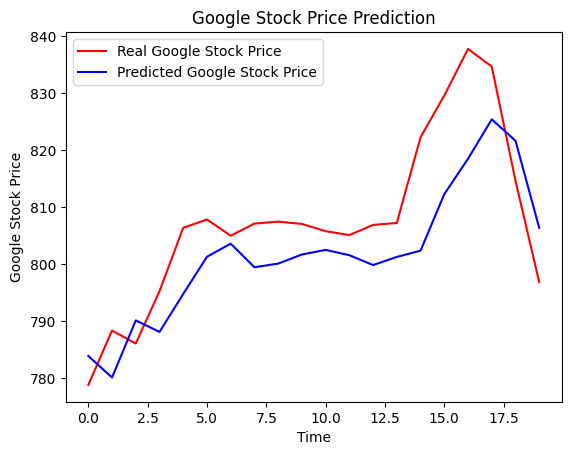

In [23]:
plt.plot(real_stock_price, color = 'red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()